<a href="https://colab.research.google.com/github/humantsattabhayya/Customer-Segmentation/blob/main/Online_Retail_Customer_Segmentation_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Extraction/identification of major topics & themes discussed in news articles. </u></b>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

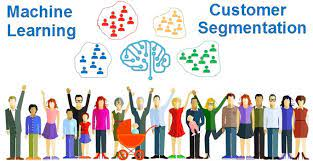

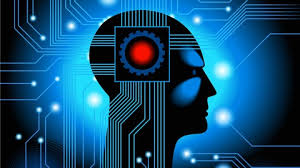

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

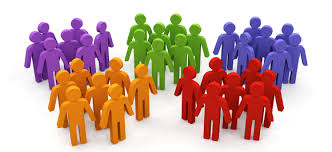

In [2]:
#Load all the required packages
import pandas as pd
import numpy as np
import datetime
import math
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import seaborn as sns

from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

##**IMPORTING DATASET:**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#file path
file='/content/drive/MyDrive/Alma better/Data/Copy of Online Retail.xlsx'
#reading excel file
dfRetail = pd.read_excel(file)
##dataset top 5 rows
dfRetail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


##**ANALYZING DATASET:**

In [5]:
#data set lower 5 rows
dfRetail.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [6]:
#getting shape of dataset
dfRetail.shape

(541909, 8)

In [7]:
#getting information
dfRetail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [8]:
#getting column names
dfRetail.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [9]:
#shifting columns
dfRetail = dfRetail[['CustomerID', 'InvoiceNo', 'InvoiceDate', 'StockCode', 'Country', 'Description', 'Quantity', 'UnitPrice']]

In [10]:
dfRetail.head()#getting head

,CustomerID,InvoiceNo,InvoiceDate,StockCode,Country,Description,Quantity,UnitPrice
0,17850.0,536365,2010-12-01 08:26:00,85123A,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55
1,17850.0,536365,2010-12-01 08:26:00,71053,United Kingdom,WHITE METAL LANTERN,6,3.39
2,17850.0,536365,2010-12-01 08:26:00,84406B,United Kingdom,CREAM CUPID HEARTS COAT HANGER,8,2.75
3,17850.0,536365,2010-12-01 08:26:00,84029G,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39
4,17850.0,536365,2010-12-01 08:26:00,84029E,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,6,3.39


##**PREPROCESSING:**

In [11]:
# Copy the Dataframe in case we mess up something
df = dfRetail.copy()

In [12]:
#getting count,mean, min,max std etc
df.describe()

,CustomerID,Quantity,UnitPrice
count,406829.000000,541909.000000,541909.000000
mean,15287.690570,9.552250,4.611114
std,1713.600303,218.081158,96.759853
min,12346.000000,-80995.000000,-11062.060000
25%,13953.000000,1.000000,1.250000
50%,15152.000000,3.000000,2.080000
75%,16791.000000,10.000000,4.130000
max,18287.000000,80995.000000,38970.000000


In [13]:
# Stats from Data Frame in case od Object Datatype
df.describe(include=['O'])

,InvoiceNo,StockCode,Country,Description
count,541909,541909,541909,540455
unique,25900,4070,38,4223
top,573585,85123A,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER
freq,1114,2313,495478,2369


##**HANDELING NULL VALUES:**

In [14]:
# Drop Duplicated rows of data from the DataFrame, It happened because of Human Error..!! :-p
print("*"*75)
print("Length of DataFrame with duplicate values : ", len(df))
df.drop_duplicates(inplace=True, keep='first')
print("*"*75)
print("Length of DataFrame after dropping all the duplicate values : ", len(df))
print("*"*75)

***************************************************************************
Length of DataFrame with duplicate values :  541909
***************************************************************************
Length of DataFrame after dropping all the duplicate values :  536641
***************************************************************************


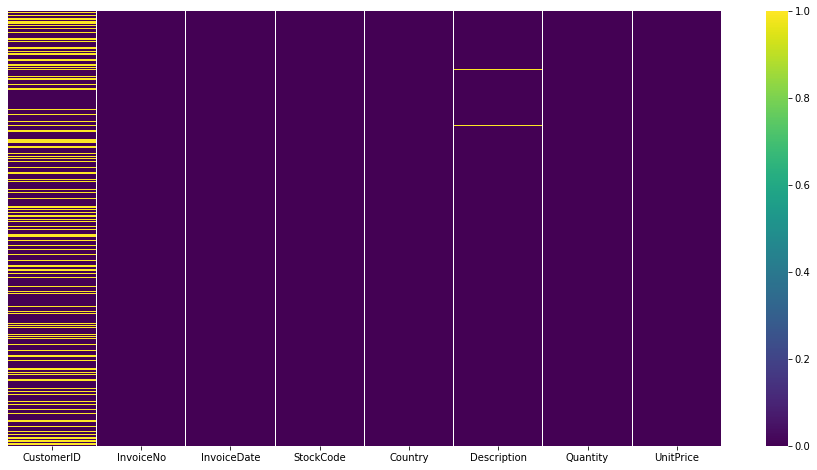

In [15]:
#plotting graph
plt.figure(figsize=(16,8))
sns.heatmap(df.isnull(), cmap='viridis', yticklabels=False)

**OBSERVATION:**
* Here shining yellow lines are null values.

In [16]:
# Creating a Definition for checking missing values.
def mdF():
    total_no = df.isnull().sum()
    missing_percentage = (df.isnull().sum()/len(df))*100
    mdF = pd.concat([total_no, missing_percentage], keys=['Missing_Values', 'Missing_Percentage'], axis=1)
    return mdF[mdF['Missing_Values'] > 1]

In [17]:
mdF()

,Missing_Values,Missing_Percentage
CustomerID,135037,25.163377
Description,1454,0.270945


**Drop the entries where both the CustomerID and Description are null values.**

In [18]:
# Drop the entries where both the CustomerID and Description are null values.
df.drop(index=df[df['CustomerID'].isna() & df['Description'].isna()].index, inplace=True)

In [19]:
df.head()

,CustomerID,InvoiceNo,InvoiceDate,StockCode,Country,Description,Quantity,UnitPrice
0,17850.0,536365,2010-12-01 08:26:00,85123A,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55
1,17850.0,536365,2010-12-01 08:26:00,71053,United Kingdom,WHITE METAL LANTERN,6,3.39
2,17850.0,536365,2010-12-01 08:26:00,84406B,United Kingdom,CREAM CUPID HEARTS COAT HANGER,8,2.75
3,17850.0,536365,2010-12-01 08:26:00,84029G,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39
4,17850.0,536365,2010-12-01 08:26:00,84029E,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,6,3.39


In [20]:
#getting columns
df.columns

Index(['CustomerID', 'InvoiceNo', 'InvoiceDate', 'StockCode', 'Country',
       'Description', 'Quantity', 'UnitPrice'],
      dtype='object')

In [21]:
mdF()

,Missing_Values,Missing_Percentage
CustomerID,133583,24.960061


##The Major Concept is to identify the Customer Categories, situation cannot proceed further with Missing Customer ID's.

In [22]:
# The Major Concept is to identify the Customer Categories, situation cannot proceed further with Missing Customer ID's
# Drop the null values in customer ID field
df.dropna(inplace=True)

In [23]:
#getting info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   CustomerID   401604 non-null  float64       
 1   InvoiceNo    401604 non-null  object        
 2   InvoiceDate  401604 non-null  datetime64[ns]
 3   StockCode    401604 non-null  object        
 4   Country      401604 non-null  object        
 5   Description  401604 non-null  object        
 6   Quantity     401604 non-null  int64         
 7   UnitPrice    401604 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.6+ MB


In [24]:
#describing
df.describe()


,CustomerID,Quantity,UnitPrice
count,401604.000000,401604.000000,401604.000000
mean,15281.160818,12.183273,3.474064
std,1714.006089,250.283037,69.764035
min,12346.000000,-80995.000000,0.000000
25%,13939.000000,2.000000,1.250000
50%,15145.000000,5.000000,1.950000
75%,16784.000000,12.000000,3.750000
max,18287.000000,80995.000000,38970.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


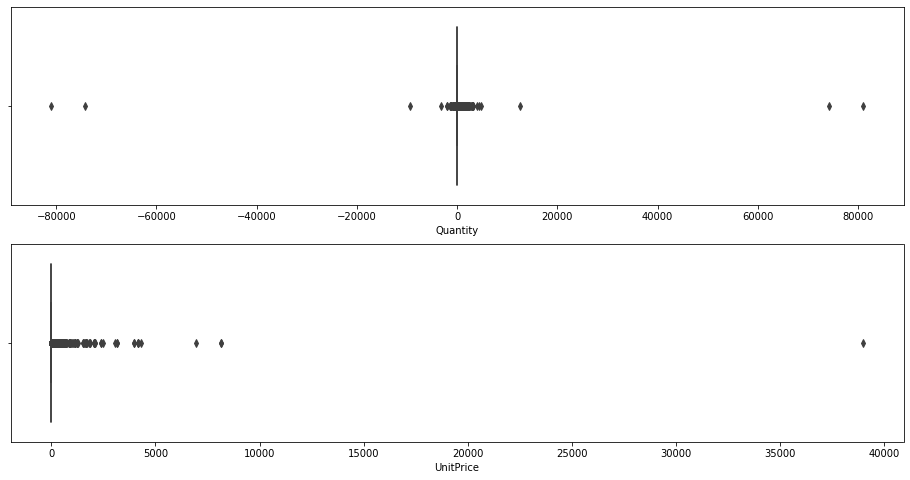

In [25]:
#plotting graph
plt.figure(figsize=(16,8))
plt.subplot(2,1,1)
sns.boxplot(df['Quantity'])
plt.subplot(2,1,2)
sns.boxplot(df['UnitPrice'])

###Quantity & Unit Price should never be negative & not equals to Zero:

In [26]:
# Quantity & Unit Price should never be negative & not equals to Zero
# Grab the data frame where both the fields are positive in nature
df = df[df['Quantity'] > 0]
df = df[df['UnitPrice'] > 0]
print("Length of Dataframe is : ",len(df))

Length of Dataframe is :  392692


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


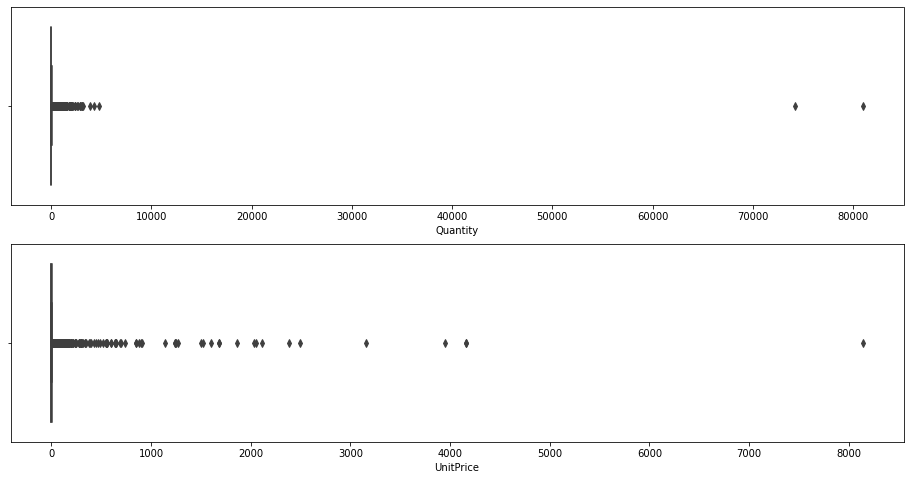

In [27]:
#plotting graph
plt.figure(figsize=(16,8))
plt.subplot(2,1,1)
sns.boxplot(df['Quantity'])
plt.subplot(2,1,2)
sns.boxplot(df['UnitPrice'])

In [28]:
df.describe()

,CustomerID,Quantity,UnitPrice
count,392692.000000,392692.000000,392692.000000
mean,15287.843865,13.119702,3.125914
std,1713.539549,180.492832,22.241836
min,12346.000000,1.000000,0.001000
25%,13955.000000,2.000000,1.250000
50%,15150.000000,6.000000,1.950000
75%,16791.000000,12.000000,3.750000
max,18287.000000,80995.000000,8142.750000


In [29]:
# Convert the Data Type of CustomerID to Integer using Lambda Function
df['CustomerID'] = df['CustomerID'].apply(lambda x: int(x))

In [30]:
df.head()

,CustomerID,InvoiceNo,InvoiceDate,StockCode,Country,Description,Quantity,UnitPrice
0,17850,536365,2010-12-01 08:26:00,85123A,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55
1,17850,536365,2010-12-01 08:26:00,71053,United Kingdom,WHITE METAL LANTERN,6,3.39
2,17850,536365,2010-12-01 08:26:00,84406B,United Kingdom,CREAM CUPID HEARTS COAT HANGER,8,2.75
3,17850,536365,2010-12-01 08:26:00,84029G,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39
4,17850,536365,2010-12-01 08:26:00,84029E,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,6,3.39


In [31]:
# Draw a new column with the total price paid by the customer
df['Total_Price'] = df['Quantity']*df['UnitPrice']

In [32]:
df.head()

,CustomerID,InvoiceNo,InvoiceDate,StockCode,Country,Description,Quantity,UnitPrice,Total_Price
0,17850,536365,2010-12-01 08:26:00,85123A,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30
1,17850,536365,2010-12-01 08:26:00,71053,United Kingdom,WHITE METAL LANTERN,6,3.39,20.34
2,17850,536365,2010-12-01 08:26:00,84406B,United Kingdom,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00
3,17850,536365,2010-12-01 08:26:00,84029G,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34
4,17850,536365,2010-12-01 08:26:00,84029E,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34


In [33]:
# draw different stats from the time stamps
year = df['InvoiceDate'].apply(lambda x: x.year)
month = df['InvoiceDate'].apply(lambda x: x.month)
weekday = df['InvoiceDate'].apply(lambda x: x.weekday())
time_hr = df['InvoiceDate'].apply(lambda x: x.time().hour)
minutes_hr = df['InvoiceDate'].apply(lambda x: x.time().minute)

In [34]:
#getting length
len(year), len(month), len(weekday), len(time_hr), len(minutes_hr)

(392692, 392692, 392692, 392692, 392692)

In [35]:
#converting month no. to month name
monthDict={1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June',
           7:'July', 8:'August', 9:'September', 10:'October', 11:'November', 12:'December'}
month = month.map(monthDict)

In [36]:
#converting no. to week day
day = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
weekday = weekday.map(day)

In [37]:
#creating function to seperate morning afternoon and evening
def Period(x):
    if 6 <= x < 12:
        return 'Morning'
    elif 12 <= x < 16:
        return 'Afternoon'
    elif 16<= x <= 20:
        return 'Evening'

In [38]:
#converting to year month weekday and time
df['Year'] = year
df['Month'] = month
df['WeekDay'] = weekday
df['TimePeriod'] = time_hr
df['TimePeriod'] = df['TimePeriod'].apply(lambda x: Period(x))

In [39]:
df.head()

,CustomerID,InvoiceNo,InvoiceDate,StockCode,Country,Description,Quantity,UnitPrice,Total_Price,Year,Month,WeekDay,TimePeriod
0,17850,536365,2010-12-01 08:26:00,85123A,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30,2010,December,Wednesday,Morning
1,17850,536365,2010-12-01 08:26:00,71053,United Kingdom,WHITE METAL LANTERN,6,3.39,20.34,2010,December,Wednesday,Morning
2,17850,536365,2010-12-01 08:26:00,84406B,United Kingdom,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00,2010,December,Wednesday,Morning
3,17850,536365,2010-12-01 08:26:00,84029G,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34,2010,December,Wednesday,Morning
4,17850,536365,2010-12-01 08:26:00,84029E,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34,2010,December,Wednesday,Morning


In [40]:
#getting head
df.head()

,CustomerID,InvoiceNo,InvoiceDate,StockCode,Country,Description,Quantity,UnitPrice,Total_Price,Year,Month,WeekDay,TimePeriod
0,17850,536365,2010-12-01 08:26:00,85123A,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30,2010,December,Wednesday,Morning
1,17850,536365,2010-12-01 08:26:00,71053,United Kingdom,WHITE METAL LANTERN,6,3.39,20.34,2010,December,Wednesday,Morning
2,17850,536365,2010-12-01 08:26:00,84406B,United Kingdom,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00,2010,December,Wednesday,Morning
3,17850,536365,2010-12-01 08:26:00,84029G,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34,2010,December,Wednesday,Morning
4,17850,536365,2010-12-01 08:26:00,84029E,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34,2010,December,Wednesday,Morning


In [41]:
#getting columns
df.columns

Index(['CustomerID', 'InvoiceNo', 'InvoiceDate', 'StockCode', 'Country',
       'Description', 'Quantity', 'UnitPrice', 'Total_Price', 'Year', 'Month',
       'WeekDay', 'TimePeriod'],
      dtype='object')

In [42]:
#shifting columns 
df = df[['CustomerID', 'InvoiceNo', 'InvoiceDate', 'Year', 'Month', 'WeekDay','TimePeriod',
         'StockCode', 'Country', 'Description', 'Quantity', 'UnitPrice', 'Total_Price']]

In [43]:
df.head()

,CustomerID,InvoiceNo,InvoiceDate,Year,Month,WeekDay,TimePeriod,StockCode,Country,Description,Quantity,UnitPrice,Total_Price
0,17850,536365,2010-12-01 08:26:00,2010,December,Wednesday,Morning,85123A,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30
1,17850,536365,2010-12-01 08:26:00,2010,December,Wednesday,Morning,71053,United Kingdom,WHITE METAL LANTERN,6,3.39,20.34
2,17850,536365,2010-12-01 08:26:00,2010,December,Wednesday,Morning,84406B,United Kingdom,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00
3,17850,536365,2010-12-01 08:26:00,2010,December,Wednesday,Morning,84029G,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34
4,17850,536365,2010-12-01 08:26:00,2010,December,Wednesday,Morning,84029E,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34


In [44]:
#copying df
customerDF = df.copy()

In [45]:
customerDF.head()#getting head

,CustomerID,InvoiceNo,InvoiceDate,Year,Month,WeekDay,TimePeriod,StockCode,Country,Description,Quantity,UnitPrice,Total_Price
0,17850,536365,2010-12-01 08:26:00,2010,December,Wednesday,Morning,85123A,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30
1,17850,536365,2010-12-01 08:26:00,2010,December,Wednesday,Morning,71053,United Kingdom,WHITE METAL LANTERN,6,3.39,20.34
2,17850,536365,2010-12-01 08:26:00,2010,December,Wednesday,Morning,84406B,United Kingdom,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00
3,17850,536365,2010-12-01 08:26:00,2010,December,Wednesday,Morning,84029G,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34
4,17850,536365,2010-12-01 08:26:00,2010,December,Wednesday,Morning,84029E,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34


In [46]:
customerDF.info()#getting info

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392692 entries, 0 to 541908
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   CustomerID   392692 non-null  int64         
 1   InvoiceNo    392692 non-null  object        
 2   InvoiceDate  392692 non-null  datetime64[ns]
 3   Year         392692 non-null  int64         
 4   Month        392692 non-null  object        
 5   WeekDay      392692 non-null  object        
 6   TimePeriod   392692 non-null  object        
 7   StockCode    392692 non-null  object        
 8   Country      392692 non-null  object        
 9   Description  392692 non-null  object        
 10  Quantity     392692 non-null  int64         
 11  UnitPrice    392692 non-null  float64       
 12  Total_Price  392692 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(7)
memory usage: 41.9+ MB


In [47]:
customerDF.describe()#describing

,CustomerID,Year,Quantity,UnitPrice,Total_Price
count,392692.000000,392692.000000,392692.000000,392692.000000,392692.000000
mean,15287.843865,2010.934631,13.119702,3.125914,22.631500
std,1713.539549,0.247177,180.492832,22.241836,311.099224
min,12346.000000,2010.000000,1.000000,0.001000,0.001000
25%,13955.000000,2011.000000,2.000000,1.250000,4.950000
50%,15150.000000,2011.000000,6.000000,1.950000,12.450000
75%,16791.000000,2011.000000,12.000000,3.750000,19.800000
max,18287.000000,2011.000000,80995.000000,8142.750000,168469.600000


In [48]:
customerDF.describe(include=['O'])#describing

,InvoiceNo,Month,WeekDay,TimePeriod,StockCode,Country,Description
count,392692,392692,392692,392692,392692,392692,392692
unique,18532,12,6,3,3665,37,3877
top,576339,November,Thursday,Afternoon,85123A,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER
freq,542,63168,79243,231998,2023,349203,2016


##**EXPLORATORY DATA ANALYSIS (EDA):**

Exploratory Data Analysis (EDA) is an approach to analyzing datasets to summarize their main characteristics, often with visual methods. EDA is used for seeing what the data can tell us before the modeling task.

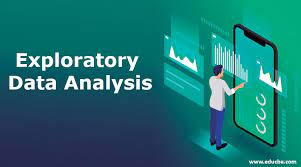

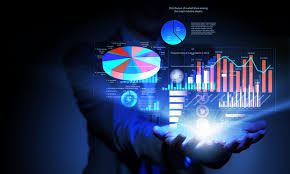

##**01 - Best Customers**


Best Customers are who have paid more to the company/service and continuously purchasing the products.

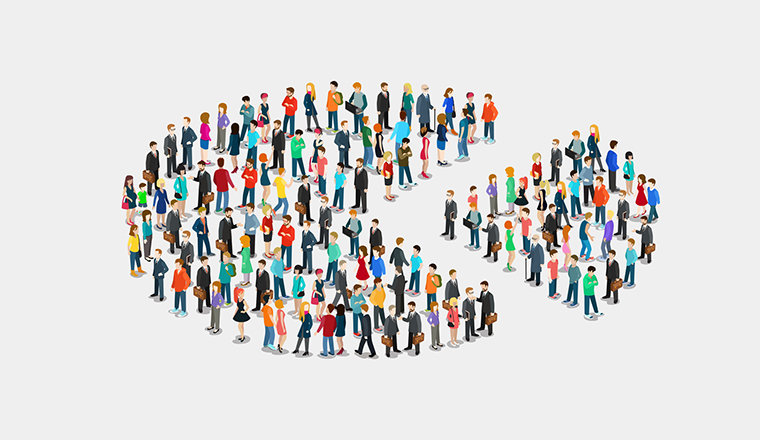

##**Top 30 Customers of our Retail Chain are:**

In [49]:
#extracting best customers using groupby
best_customers = customerDF.groupby(by='CustomerID')['Total_Price'].sum().sort_values(ascending=False)[:30]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


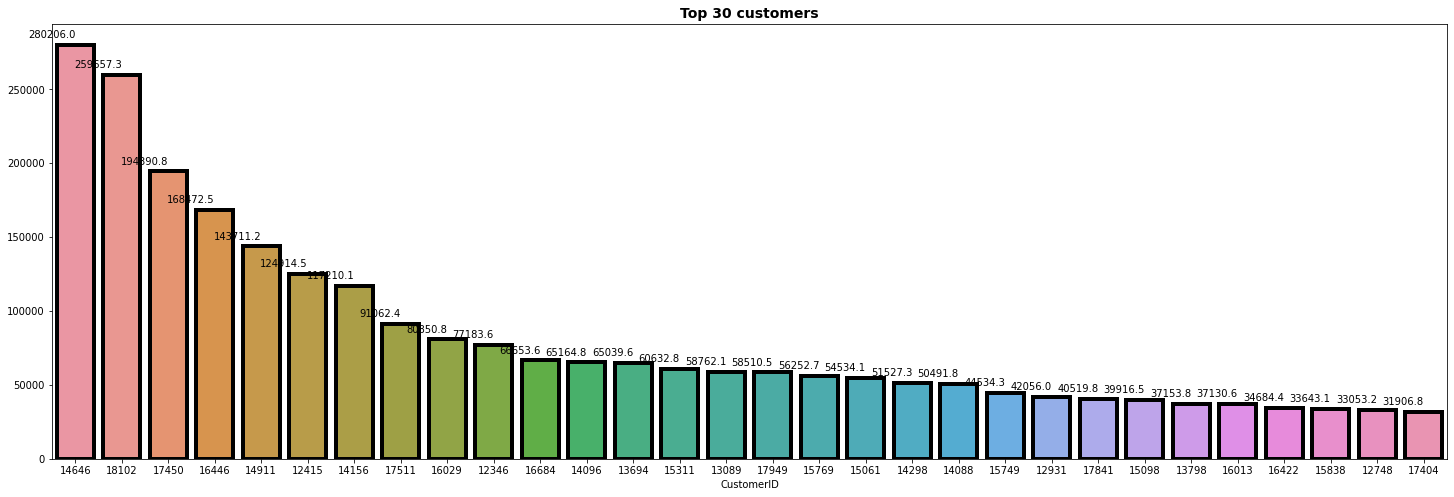

In [50]:
# Here, we plot the bar plot
plt.figure(figsize=(55,8))
plt.subplot(1,2,1)
ax=sns.barplot(best_customers.index, best_customers.values, order=best_customers.index,lw=4,
               ec='black',hatch='')
plt.title("Top 30 customers", fontsize=14, fontweight="bold")

# Adding Annotation
for p in ax.patches:
  ax.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height())
  , ha = 'right', va = 'center', xytext = (0, 10), textcoords = 'offset points')

##**02 - Worst Customers**
* Every Customer is a Good Customer, the worst could be measured in terms of loyalty.

* Every penny recieved from the customer is an achievement and the hardwork of the company.

##**03 - Periodical Purchasing Stats**

##**Year purchasing stats:**

In [51]:
#importing library
from plotnine import*

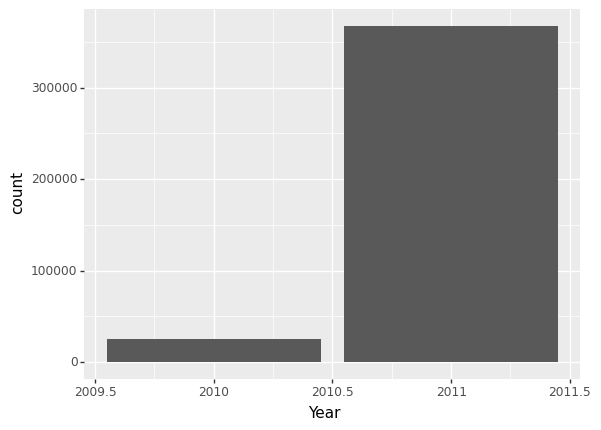

<ggplot: (8729134563009)>

In [52]:
#plotting graph
ggplot(customerDF)+ aes("Year",fill="Year")+geom_bar()

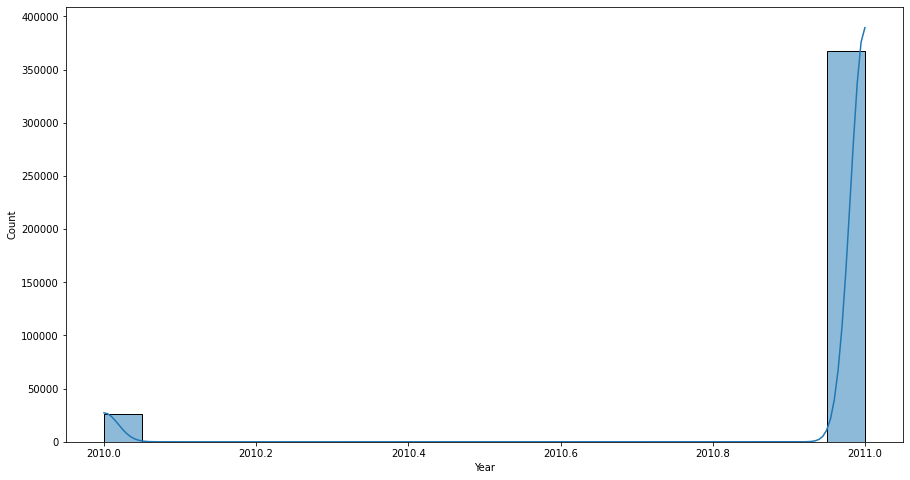

In [53]:
#plotting graph
fig, ax=plt.subplots(figsize=(15,8))
sns.histplot(data=customerDF, x="Year", kde= True,ax=ax)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
No handles with labels found to put in legend.


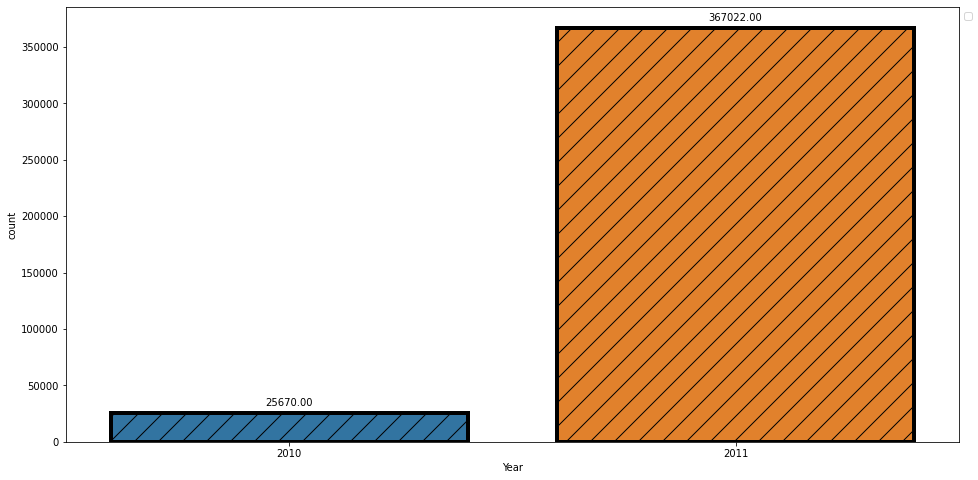

In [54]:
# Plotting the graph

plt.figure(figsize=(16,8))
ax=sns.countplot(customerDF['Year'],lw=4, ec='black'
                 , hatch='/')

# Adding Annotation
for p in ax.patches:
  ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height())
  , ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

# Placing the Legend outside
plt.legend(bbox_to_anchor=(1,1), loc="upper left")

**OBSERVATION:**

* Here we can see huge spike in 2011 this is because we only have december months data from 2010.

##**Month purchasing stats:**

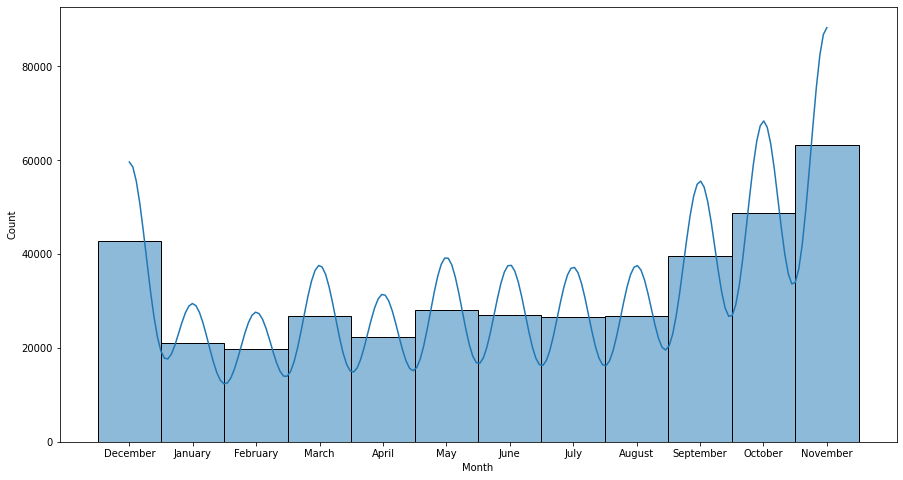

In [55]:
#plotting graph
fig, ax=plt.subplots(figsize=(15,8))
sns.histplot(data=customerDF, x="Month", kde= True,ax=ax)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


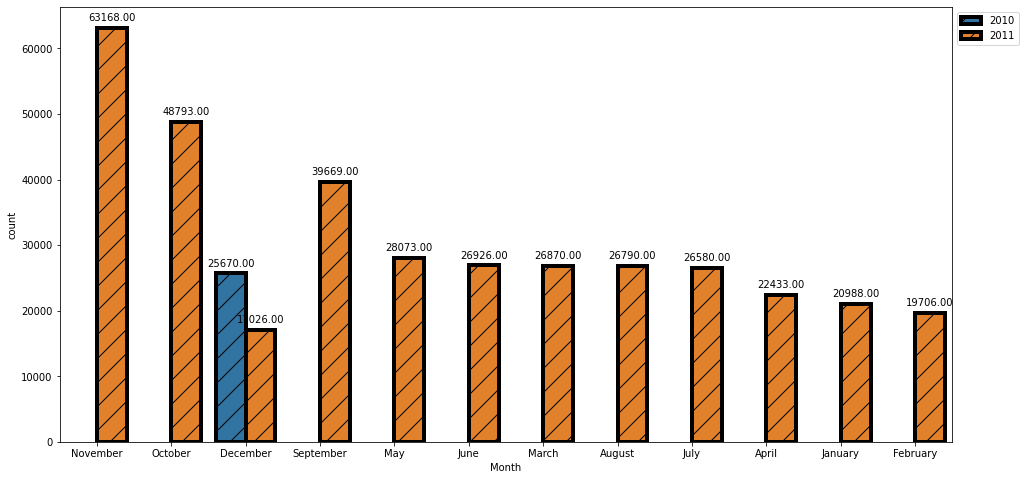

In [56]:
# Plotting the graph

plt.figure(figsize=(16,8))
ax=sns.countplot(customerDF['Month'], order=customerDF['Month'].value_counts().index, hue=customerDF['Year'],lw=4, ec='black'
                 , hatch='/')

# Adding Annotation
for p in ax.patches:
  ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height())
  , ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

# Placing the Legend outside
plt.legend(bbox_to_anchor=(1,1), loc="upper left")

**OBSERVATION:**

* Here we can see there is huge sale in the month of october and november.

##**Week day purchasing stats:**

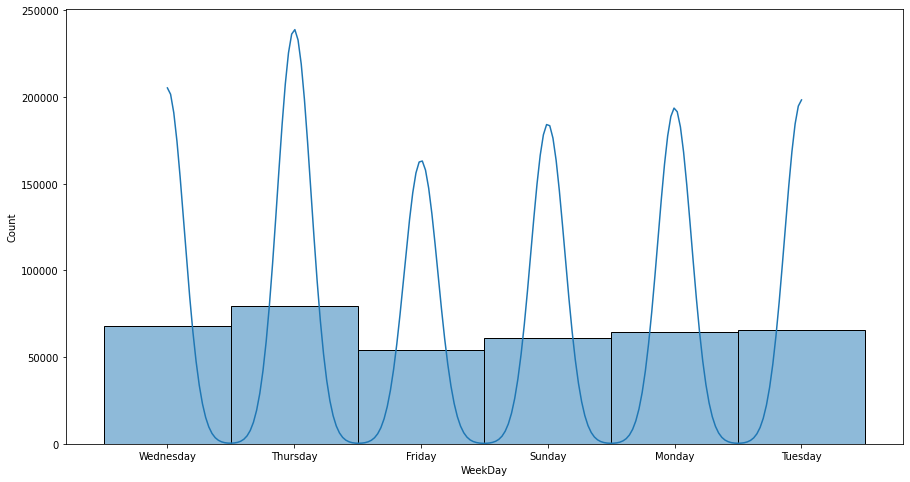

In [57]:
#plotting graph
fig, ax=plt.subplots(figsize=(15,8))
sns.histplot(data=customerDF, x="WeekDay", kde= True,ax=ax)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
No handles with labels found to put in legend.


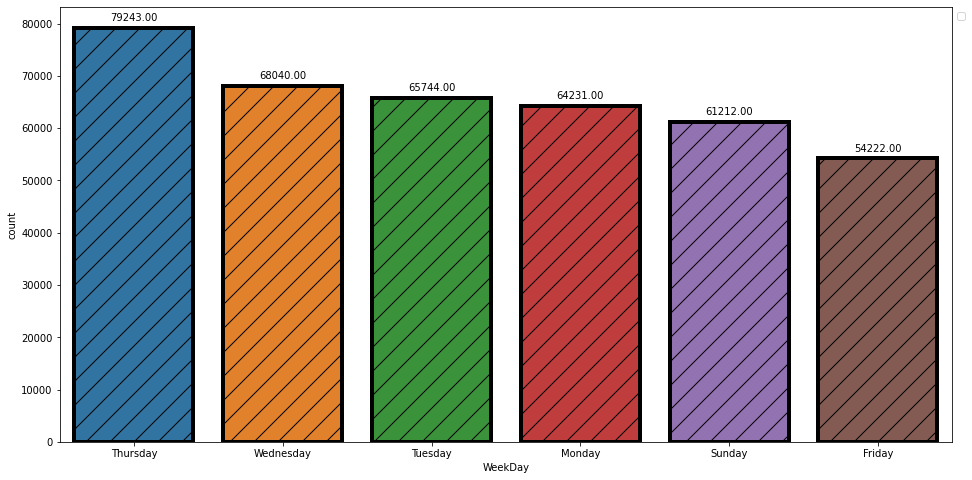

In [58]:
# Plotting the graph

plt.figure(figsize=(16,8))
ax=sns.countplot(customerDF['WeekDay'], order=customerDF['WeekDay'].value_counts().index,lw=4, ec='black'
                 , hatch='/')

# Adding Annotation
for p in ax.patches:
  ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height())
  , ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

# Placing the Legend outside
plt.legend(bbox_to_anchor=(1,1), loc="upper left")

**OBSERVATION:**

* Here we cann see on wednesday and thursday there is more sale.

##**Time period purchasing stats:**

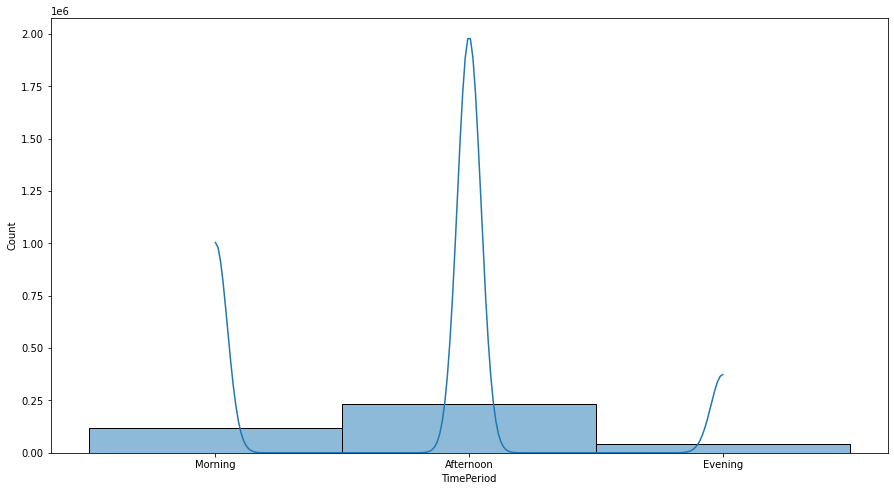

In [59]:
#plotting graph
fig, ax=plt.subplots(figsize=(15,8))
sns.histplot(data=customerDF, x="TimePeriod", kde= True,ax=ax)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
No handles with labels found to put in legend.


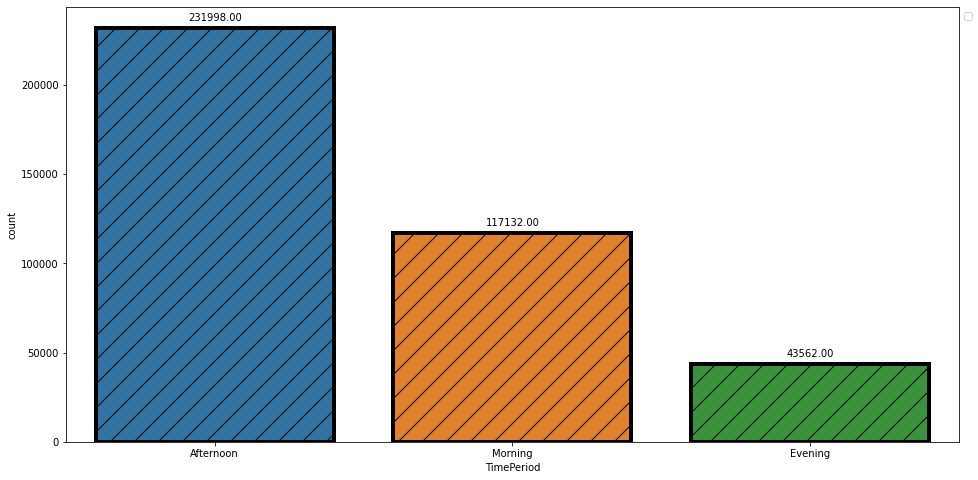

In [60]:
# Plotting the graph

plt.figure(figsize=(16,8))
ax=sns.countplot(customerDF['TimePeriod'], order=customerDF['TimePeriod'].value_counts().index,lw=4, ec='black'
                 , hatch='/')

# Adding Annotation
for p in ax.patches:
  ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height())
  , ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

# Placing the Legend outside
plt.legend(bbox_to_anchor=(1,1), loc="upper left")

**OBSERVATION:**

* Here we can see people are buying on afternoon time period more.


**Insights from the Periodical Plots:**

**OBSERVATION:**

* Sales are very high in October, November & December

* We have only December sales data from 2010

* The Retail Store is Closed on Saturday as per the Information available

* More number of sales are happening during Middle of the week(Tuesday, Wednesday and Thursday in ascending order respectively)

* People are usually visiting the store during the afternoon hours when compared to Mornng & Evening Times

* The total no of sales in December 2010 is higher then December 2011

* Management has to concentrate on the decrease of sales in December

##**04 - Most Revenue Generated WeekDay:**

In [61]:
#EXTRACTING MOST REVENUE GENERATED WEEKDAY USING GROUPBY 
weekly_sales = customerDF.groupby(by='WeekDay')['Total_Price'].sum().sort_values(ascending=False)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


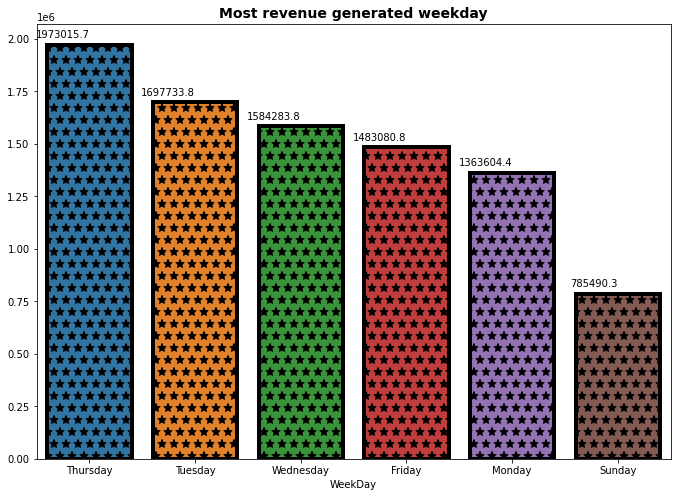

In [62]:
# Here, we plot the bar plot
plt.figure(figsize=(25,8))
plt.subplot(1,2,1)
ax=sns.barplot(weekly_sales.index, weekly_sales.values, order=weekly_sales.index,lw=4,
               ec='black',hatch='*')
plt.title("Most revenue generated weekday", fontsize=14, fontweight="bold")

# Adding Annotation
for p in ax.patches:
  ax.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height())
  , ha = 'right', va = 'center', xytext = (0, 10), textcoords = 'offset points')

**OBSERVATION:**

* On Thursday Company is generating the highest Revenue
* On Sunday company is generating less revenue

##**05 - Purchase Stats**


- Regional Purchase Information

In [63]:
#getting purchase stas
country_sales = customerDF.groupby(by='Country')['Total_Price'].sum().sort_values(ascending=False)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


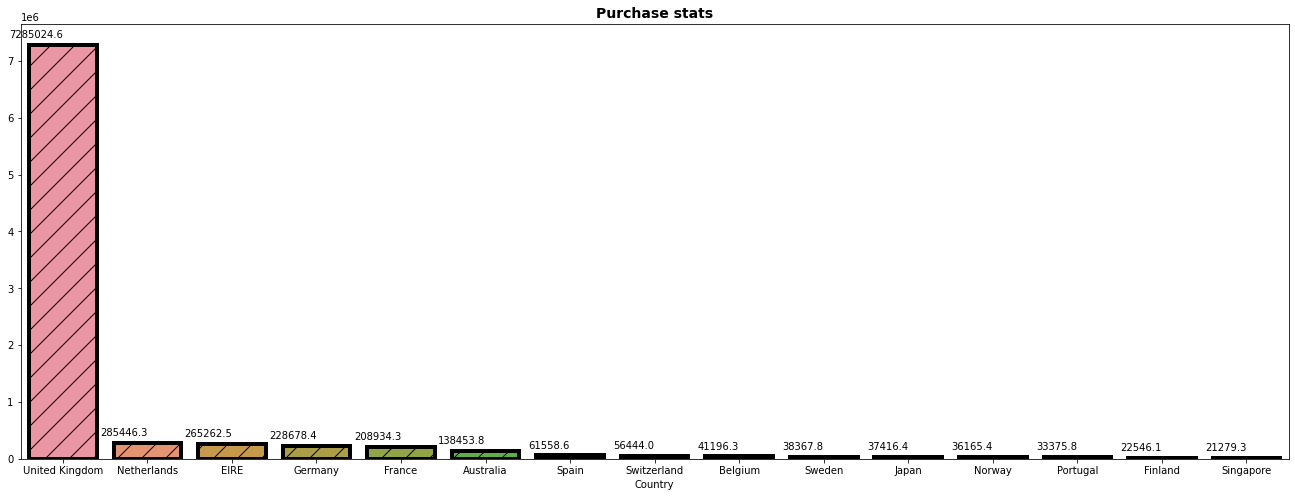

In [64]:
# Here, we plot the bar plot
plt.figure(figsize=(50,8))
plt.subplot(1,2,1)
ax=sns.barplot(country_sales[:15].index, country_sales[:15].values,lw=4,
               ec='black',hatch='/')
plt.title("Purchase stats", fontsize=14, fontweight="bold")

# Adding Annotation
for p in ax.patches:
  ax.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height())
  , ha = 'right', va = 'center', xytext = (0, 10), textcoords = 'offset points')

**OBSERVATION:**

* Here we can see united kingdom is the country which purchace more items as compared to oyher country.
* Singapore is a least purchasing country.

##**Top Purchasing Countries:**

In [65]:
#extracting top purchasing country
sales = df.groupby(by='Country').agg({'Quantity' : 'sum', 
                                      'Total_Price' : 'sum'}).sort_values(by=['Quantity'], ascending=False)

In [66]:
#top 10
sales=sales[:10]
sales=sales.reset_index()
sales

,Country,Quantity,Total_Price
0,United Kingdom,4241305,7.285025e+06
1,Netherlands,200361,2.854463e+05
2,EIRE,140133,2.652625e+05
3,Germany,119154,2.286784e+05
4,France,111428,2.089343e+05
5,Australia,83891,1.384538e+05
6,Sweden,36078,3.836783e+04
7,Switzerland,30082,5.644395e+04
8,Spain,27933,6.155856e+04
9,Japan,26016,3.741637e+04


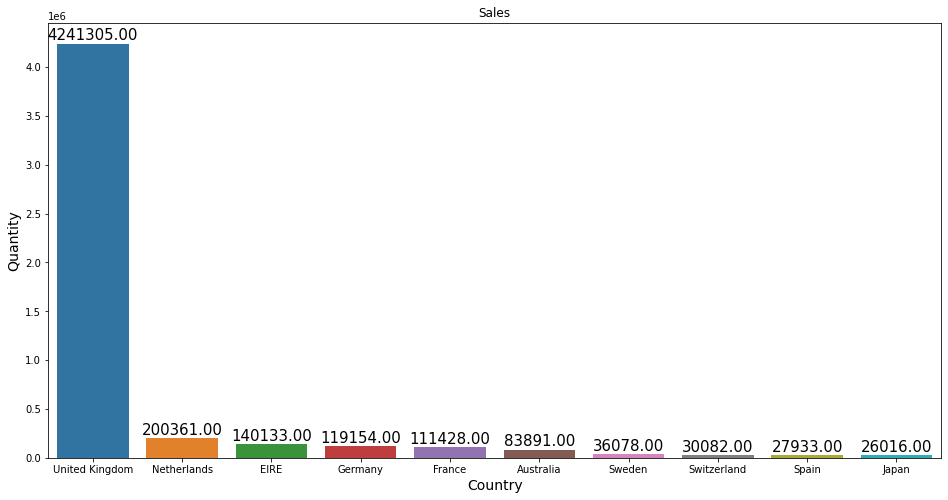

In [67]:
# Defining the plot size
plt.figure(figsize=(16, 8))
 
# Defining the values for x-axis, y-axis
# and from which dataframe the values are to be picked
plots = sns.barplot(x="Country", y="Quantity", data=sales)
 
# Iterrating over the bars one-by-one
for bar in plots.patches:
   
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
 
# Setting the label for x-axis
plt.xlabel("Country", size=14)
 
# Setting the label for y-axis
plt.ylabel("Quantity", size=14)
 
# Setting the title for the graph
plt.title("Sales")
 
# Finally showing the plot
plt.show()

##**Lease Purchasing Countries:**

In [68]:
#extracting least purchasing country
lease=sales[-10:].sort_values(by=['Total_Price']).reset_index()
lease

,index,Country,Quantity,Total_Price
0,9,Japan,26016,3.741637e+04
1,6,Sweden,36078,3.836783e+04
2,7,Switzerland,30082,5.644395e+04
3,8,Spain,27933,6.155856e+04
4,5,Australia,83891,1.384538e+05
5,4,France,111428,2.089343e+05
6,3,Germany,119154,2.286784e+05
7,2,EIRE,140133,2.652625e+05
8,1,Netherlands,200361,2.854463e+05
9,0,United Kingdom,4241305,7.285025e+06


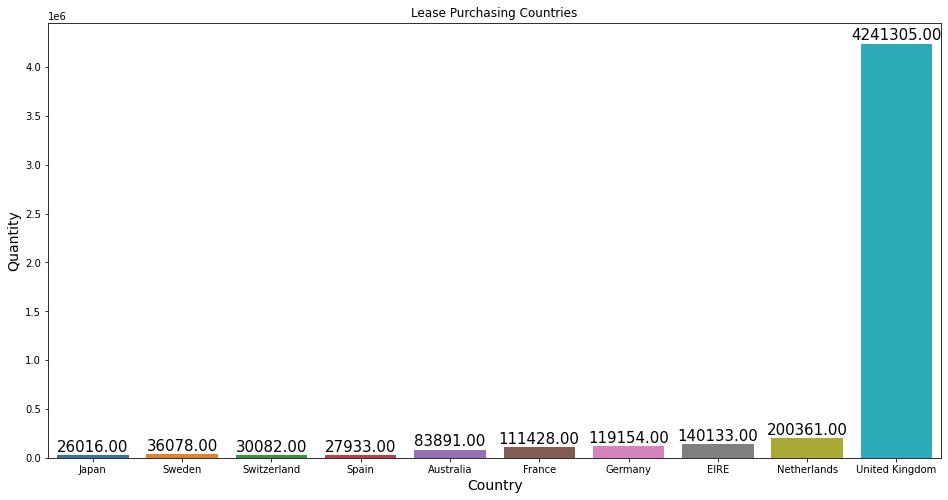

In [69]:
# Defining the plot size
plt.figure(figsize=(16, 8))
 
# Defining the values for x-axis, y-axis
# and from which dataframe the values are to be picked
plots = sns.barplot(x="Country", y="Quantity", data=lease)
 
# Iterrating over the bars one-by-one
for bar in plots.patches:
   
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
 
# Setting the label for x-axis
plt.xlabel("Country", size=14)
 
# Setting the label for y-axis
plt.ylabel("Quantity", size=14)
 
# Setting the title for the graph
plt.title("Lease Purchasing Countries")
 
# Finally showing the plot
plt.show()

##**06 - Product Sales Categorization**

In [70]:
#extracting product sale
product_sales = customerDF.groupby(by='Description')['Quantity'].sum().sort_values(ascending=False)

WordCloud for Products

In [71]:
#importing package
from wordcloud import WordCloud

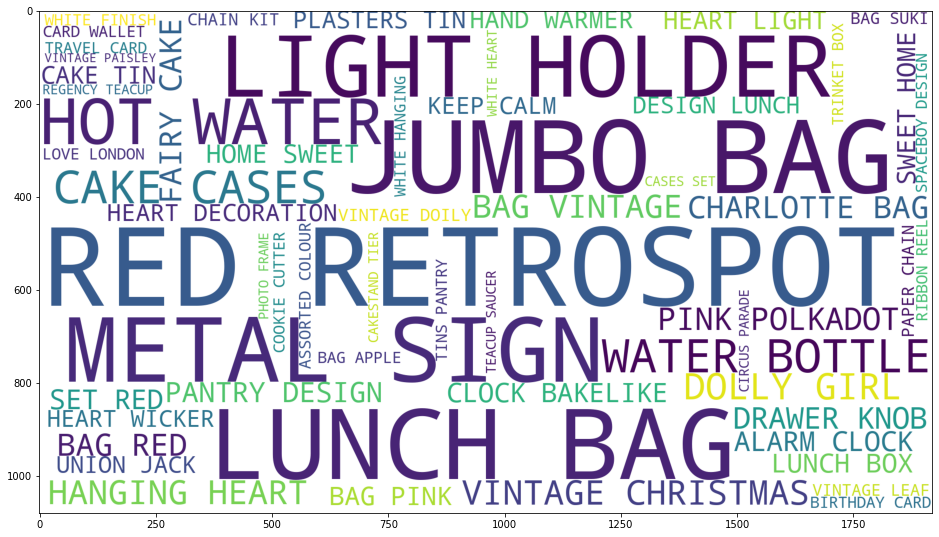

In [72]:
#plotting word cloud
text = " ".join(df['Description'].values.tolist())
img = WordCloud(width=1920, height=1080,
                background_color='white', max_words=60).generate(text)
plt.figure(figsize=(16,10))
plt.imshow(img)

**OBSERVATION:**

* Above we can see the product sale categories.

##**07 - Top 20 Sold Products**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


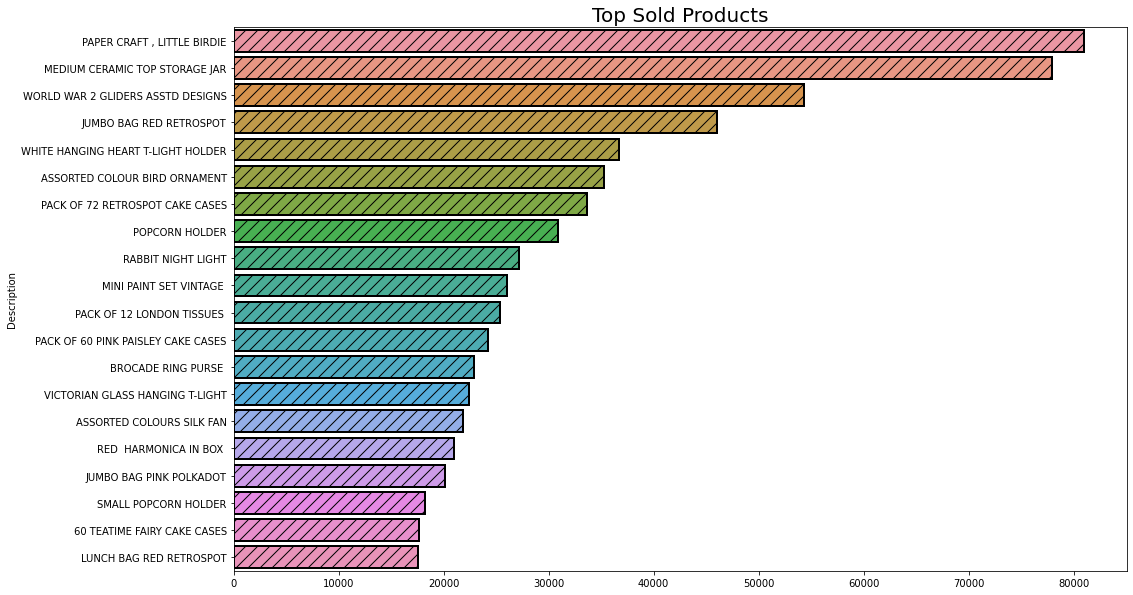

In [73]:
#plotting graph
plt.figure(figsize=(16,10))
plt.title("Top Sold Products", fontsize=20)
sns.barplot(product_sales[:20].values, product_sales[:20].index,ec='black',linewidth=2,hatch='//')

**OBSERVATION:**

* Here we can see most sold product product is Paper craft, little birdie and leat sold product is lunch bad red retrospot

##**08 - Most Revenue Generated Products**

In [74]:
#extracting most revenue generated product
product_revenue = customerDF.groupby(by='Description')['Total_Price'].sum().sort_values(ascending=False)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


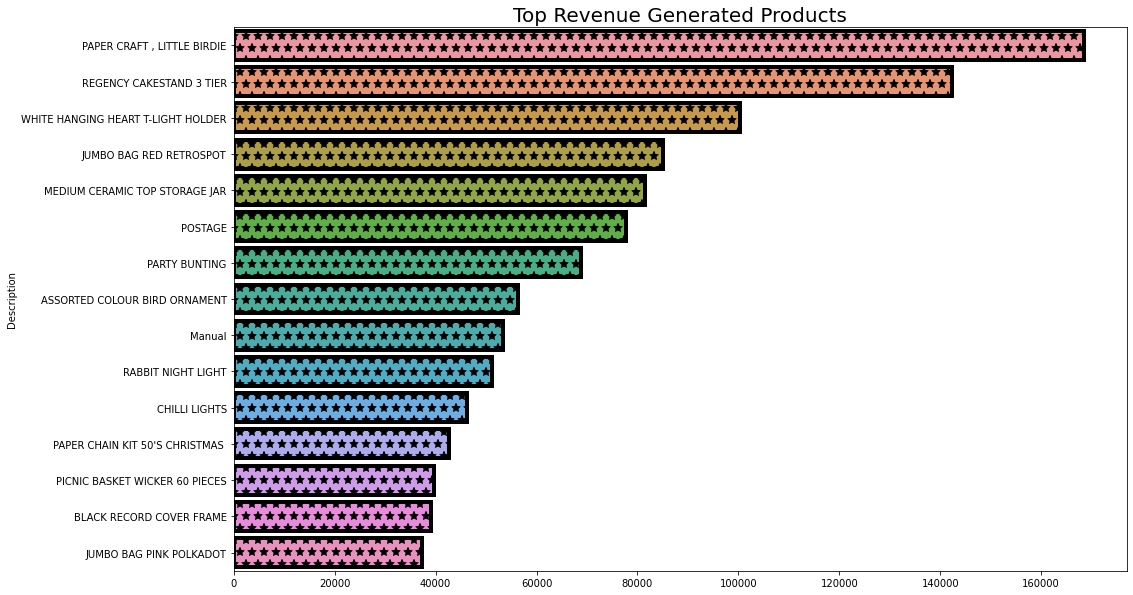

In [75]:
#plotting graph
plt.figure(figsize=(16,10))
plt.title("Top Revenue Generated Products", fontsize=20)
sns.barplot(product_revenue[:15].values, product_revenue[:15].index,lw=4,
               ec='black',hatch='*')

**OBSERVATION:**

* Here we can see most revenue generated product is Paper craft, little birdie and least revenue generated product is jumbo bag pink polkadot.

##**09 - Customers Stats (Loyalty, Daily Buyer)**


* Customer loyalty is the act of choosing one company's products and services consistently over their competitors. When a customer is loyal to one company, they aren't easily swayed by price or availability. They would rather pay more and ensure the same quality service & product they know

* Since we don't have the purchase stats of our customers with the other companies, Let us seggregate them into 3 Categories based on thier purchases as Bronze, Silver and Gold

In [76]:
#extracting loyal customers
loyal_customers = customerDF.groupby(by='CustomerID')['Quantity'].sum().sort_values(ascending=False)

Customers Who are willing to purchase most from the store:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


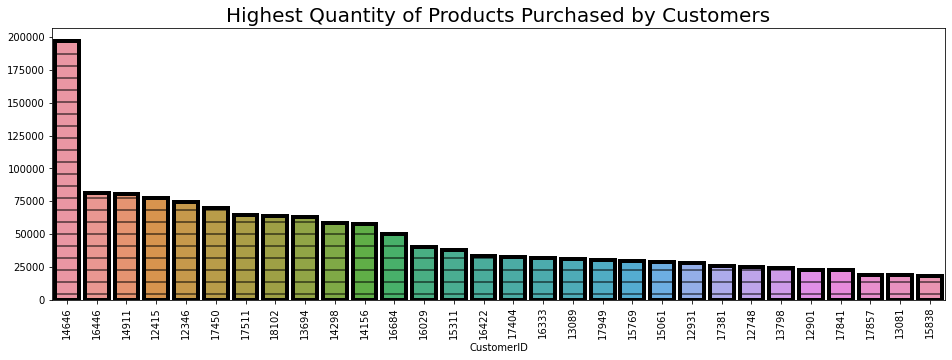

In [77]:
#plotting graph
plt.figure(figsize=(16,5))
plt.xticks(rotation=90)
plt.title("Highest Quantity of Products Purchased by Customers", fontsize=20)
sns.barplot(loyal_customers[:30].index, loyal_customers[:30].values, order=loyal_customers[:30].index,lw=4,
               ec='black',hatch='-')

**OBSERVATION:**

* Above are the customer id who purchased highest quantity of products.

In [78]:
#describing
loyal_customers.describe()

count      4338.000000
mean       1187.644537
std        5043.619654
min           1.000000
25%         159.000000
50%         378.000000
75%         989.750000
max      196915.000000
Name: Quantity, dtype: float64

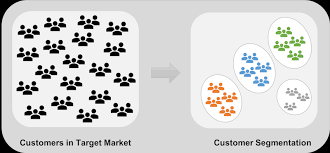

In [79]:
#creating function to divide customers into bronze silver gold category
def Loyalty(x):
    if x<500:
        return "Bronze"
    elif 500 <= x < 1000:
        return "Silver"
    elif x >= 1000:
        return "Gold"

In [80]:
#applying function
loyal_customers_categories = loyal_customers.apply(lambda x: Loyalty(x))

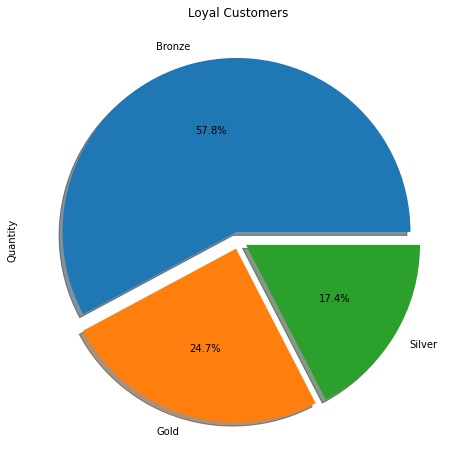

In [81]:
#plottingh pie diagram
loyal_customers_categories.value_counts().plot.pie(figsize=(10,8),legend=False,autopct='%1.1f%%',shadow=True,explode=(0.05,0.05,0.05),title='Loyal Customers')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


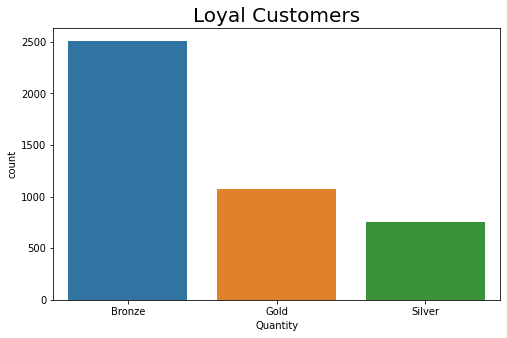

In [82]:
#plotting graph
plt.figure(figsize=(8,5))
plt.title("Loyal Customers", fontsize=20)
sns.countplot(loyal_customers_categories, order=loyal_customers_categories.value_counts().index)

**OBSERVATION:**

* Here we can see we have more no. of bronze customers.

##**10 - Customers Who Buy Often, But Spend Very Little**

In [83]:
#daily customers
daily_customers = customerDF.groupby(by='CustomerID').agg(
    {"InvoiceNo" : "nunique","Total_Price" : 'sum'}).sort_values(by=['InvoiceNo', 'Total_Price'], ascending=[False, True])

# Considering 20,000 is less payment from Daily Customers
daily_customers = daily_customers[daily_customers['Total_Price'] < 20000]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


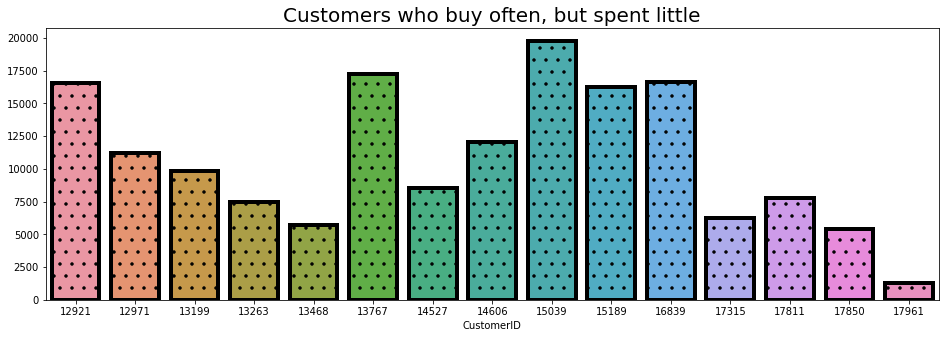

In [84]:
#plotting graph
plt.figure(figsize=(16,5))
plt.title("Customers who buy often, but spent little", fontsize = 20)
sns.barplot(daily_customers['Total_Price'][:15].index,
            daily_customers['Total_Price'][:15].values,lw=4,
               ec='black',hatch='.')

**OBSERVATION:**

* Above we cann see Customers who buy often, but spent little

##**11 - Customers We have Lost**

In [85]:
#extracting lost customers
lost_customers = customerDF[customerDF['Year'] == 2011].groupby(by='Month')['CustomerID'].nunique()

lost_customers

Month
April         856
August        935
December      615
February      758
January       741
July          949
June          991
March         974
May          1056
November     1664
October      1364
September    1266
Name: CustomerID, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


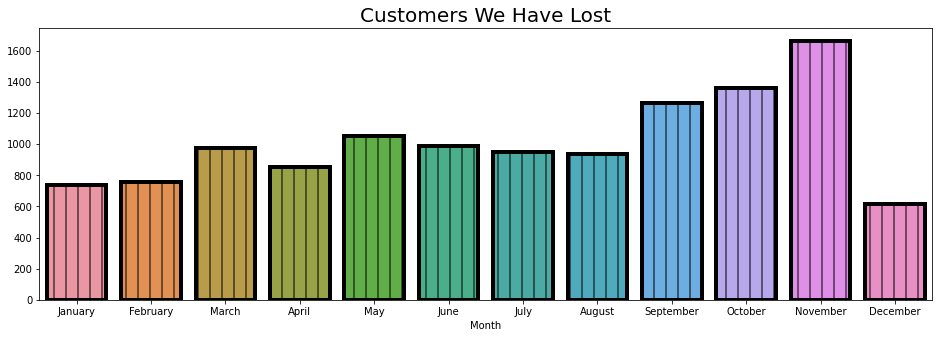

In [86]:
#plotting graph
plt.figure(figsize=(16,5))
plt.title('Customers We Have Lost', fontsize = 20)
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
sns.barplot(lost_customers.index, lost_customers.values, order=months,lw=4,
               ec='black',hatch='|')

**OBSERVATION:**

* We can observe that very number of customers are lost visiting the store. At the end of the year many customers are lost.

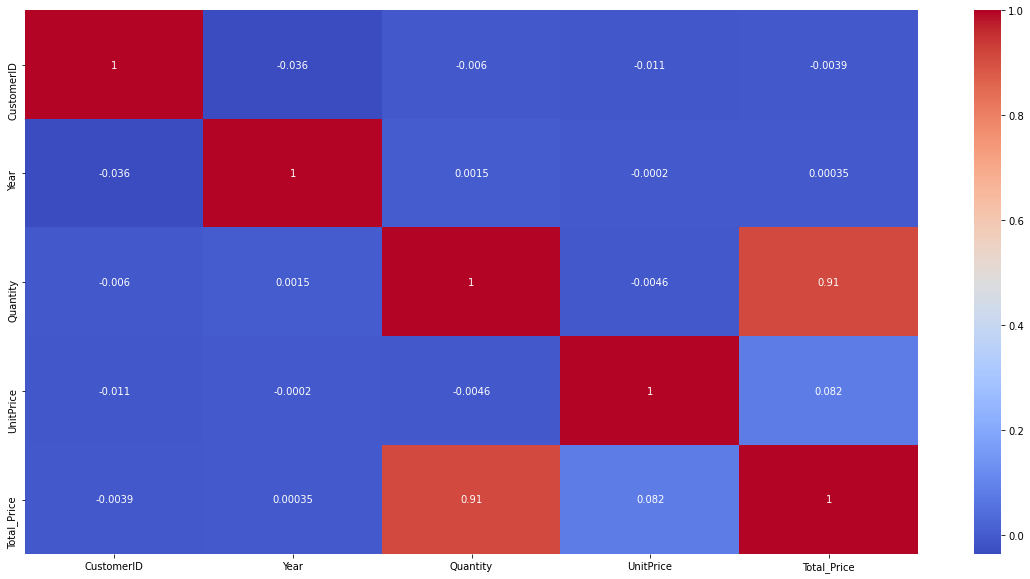

In [87]:
#finding Correlation
fig, ax = plt.subplots(figsize = ( 20 , 10 ))
correlation = customerDF.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
fig.savefig('Heatmap2')

##**Unique item stock codes and their description**

In [88]:
#Find number of unique items in stock
print(f"Number of unique item stock codes: {len(customerDF.StockCode.unique())}")
print(f"Number of unique item descriptions: {len(customerDF.Description.unique())}")

Number of unique item stock codes: 3665
Number of unique item descriptions: 3877


**OBSERVATION:**

* The count of unique stock unit ids and their descriptions should have matched but they do not. This implies some stock units might have more than one descriptions. Let us examine the reasons behind this data quality issue:

In [89]:
#Find out the stock units that have more than one description
dfStockDesc = customerDF.groupby(["StockCode","Description"]).count().reset_index()
dfStockDesc.StockCode.value_counts()[dfStockDesc.StockCode.value_counts()>1].reset_index().head()

,index,StockCode
0,23236,4
1,23196,4
2,23203,3
3,23131,3
4,23413,3


In [90]:
#COPYING DATASET IN OTHER VARIABLE
dfRetail = customerDF.copy()


In [91]:
dfRetail.head(3)

,CustomerID,InvoiceNo,InvoiceDate,Year,Month,WeekDay,TimePeriod,StockCode,Country,Description,Quantity,UnitPrice,Total_Price
0,17850,536365,2010-12-01 08:26:00,2010,December,Wednesday,Morning,85123A,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30
1,17850,536365,2010-12-01 08:26:00,2010,December,Wednesday,Morning,71053,United Kingdom,WHITE METAL LANTERN,6,3.39,20.34
2,17850,536365,2010-12-01 08:26:00,2010,December,Wednesday,Morning,84406B,United Kingdom,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00


**Filter UK only data:**

* We noticed in the exploratory data analysis phase that majority of the transactions belonged to UK, so it makes sense to consider only this country data for maximum impact

In [92]:
#considering united kingdom data only.
dfRetail = dfRetail[dfRetail.Country == "United Kingdom"]

**Exclude return transactions:**

We remove the negative (return goods) transactions before proceeding with the analysis.

In [93]:
dfRetail = dfRetail[dfRetail.Total_Price >= 0]
dfRetail.head()

,CustomerID,InvoiceNo,InvoiceDate,Year,Month,WeekDay,TimePeriod,StockCode,Country,Description,Quantity,UnitPrice,Total_Price
0,17850,536365,2010-12-01 08:26:00,2010,December,Wednesday,Morning,85123A,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30
1,17850,536365,2010-12-01 08:26:00,2010,December,Wednesday,Morning,71053,United Kingdom,WHITE METAL LANTERN,6,3.39,20.34
2,17850,536365,2010-12-01 08:26:00,2010,December,Wednesday,Morning,84406B,United Kingdom,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00
3,17850,536365,2010-12-01 08:26:00,2010,December,Wednesday,Morning,84029G,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34
4,17850,536365,2010-12-01 08:26:00,2010,December,Wednesday,Morning,84029E,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34


In [94]:
dfRetail.shape

(349203, 13)

##**Feature Engineering - Building features for RFM model**

RFM stands for Recency, Frequency, and Monetary value, each corresponding to some key customer trait. These RFM metrics are important indicators of a customer’s behavior because frequency and monetary value affects a customer’s lifetime value, and recency affects retention, a measure of engagement.

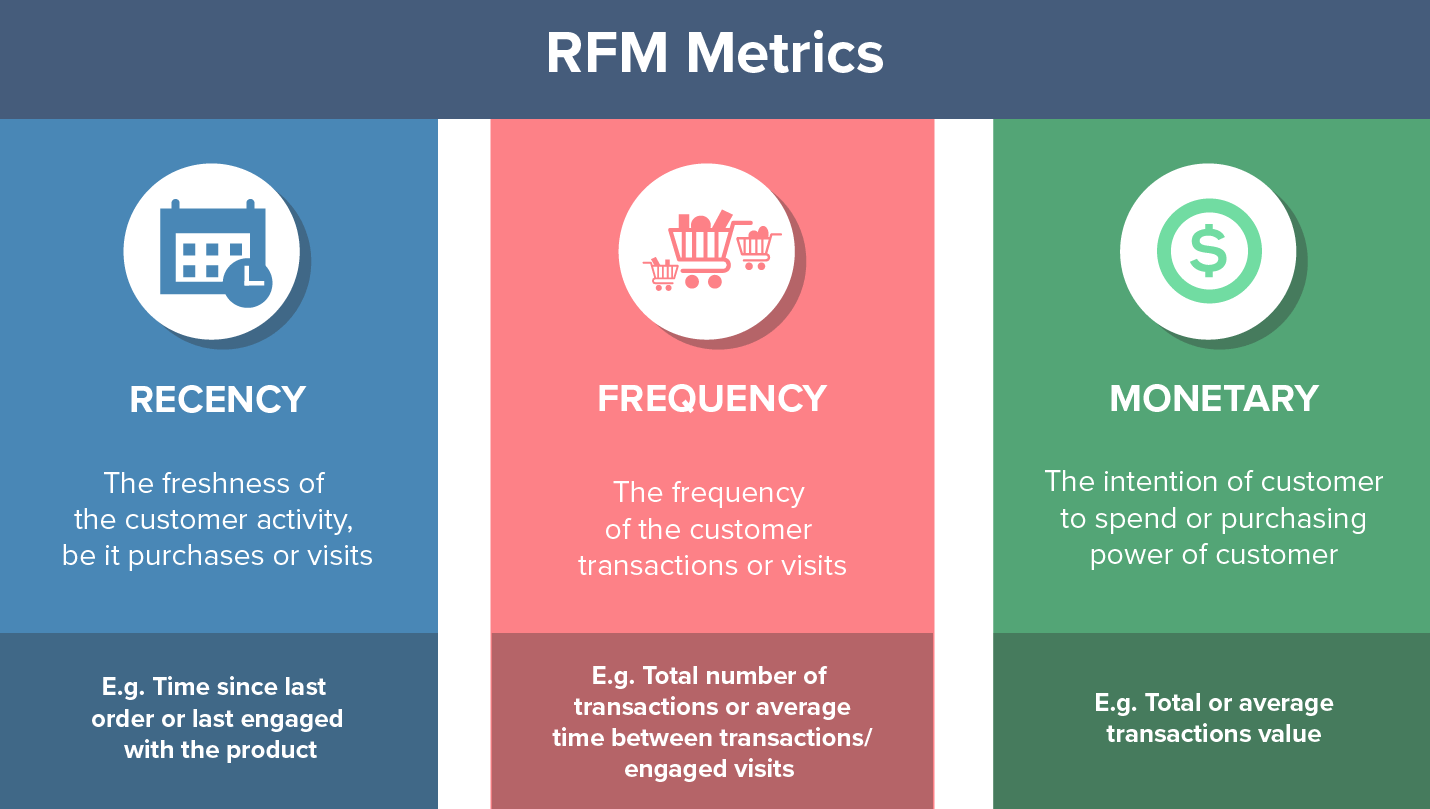

Businesses that lack the monetary aspect, like viewership, readership, or surfing-oriented products, could use Engagement parameters instead of Monetary factors. This results in using RFE – a variation of RFM. Furthermore, this Engagement parameter could be defined as a composite value based on metrics such as bounce rate, visit duration, number of pages visited, time spent per page, etc.

**RFM factors illustrate these facts:**

* The more recent the purchase, the more responsive the customer is to promotions
* The more frequently the customer buys, the more engaged and satisfied they are
* Monetary value differentiates heavy spenders from low-value purchasers

In [95]:
# Split datetime from InvoiceDate
dfRetail['Date'] = dfRetail['InvoiceDate'].dt.date
dfRetail['Time'] = dfRetail['InvoiceDate'].dt.time



dfRetail.head()

,CustomerID,InvoiceNo,InvoiceDate,Year,Month,WeekDay,TimePeriod,StockCode,Country,Description,Quantity,UnitPrice,Total_Price,Date,Time
0,17850,536365,2010-12-01 08:26:00,2010,December,Wednesday,Morning,85123A,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30,2010-12-01,08:26:00
1,17850,536365,2010-12-01 08:26:00,2010,December,Wednesday,Morning,71053,United Kingdom,WHITE METAL LANTERN,6,3.39,20.34,2010-12-01,08:26:00
2,17850,536365,2010-12-01 08:26:00,2010,December,Wednesday,Morning,84406B,United Kingdom,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00,2010-12-01,08:26:00
3,17850,536365,2010-12-01 08:26:00,2010,December,Wednesday,Morning,84029G,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34,2010-12-01,08:26:00
4,17850,536365,2010-12-01 08:26:00,2010,December,Wednesday,Morning,84029E,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34,2010-12-01,08:26:00


In [96]:
# Calculate 1-year date range from latest data
earliest_date = dfRetail['Date'].min()
end_date = dfRetail['Date'].max()

print("Actual Start Date: {}, Actual End Date: {}".format(earliest_date, end_date))

# Filter 1-year data range from original df
start_date = end_date - pd.to_timedelta(364, unit='d')
df_rfm = dfRetail[(dfRetail['Date'] >= start_date) & (dfRetail['Date'] <= end_date)]

print("RFM Start Date: {}, RFM End Date: {}".format(
    df_rfm['Date'].min(), df_rfm['Date'].max()))

Actual Start Date: 2010-12-01, Actual End Date: 2011-12-09
RFM Start Date: 2010-12-10, RFM End Date: 2011-12-09


In [97]:
#importing package
import datetime as dt

In [98]:
# Create hypothetical snapshot date
snapshot_date = end_date + dt.timedelta(days=1)

# Calculate Recency, Frequency and Monetary value for each customer
df_rfm = df_rfm.groupby(['CustomerID']).agg({
    'Date': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'count',
    'Total_Price': 'sum'})

# Rename the columns
df_rfm.rename(columns={'Date': 'Recency',
                       'InvoiceNo': 'Frequency',
                      'Total_Price': 'MonetaryValue'}, inplace=True)

# Print top 5 rows
print(df_rfm.head())

            Recency  Frequency  MonetaryValue
CustomerID                                   
12346           326          1       77183.60
12747             3         96        3837.45
12748             1       4054       31081.74
12749             4        199        4090.88
12820             4         59         942.34


**Building RFM Segments**

Assigning quantile to each customer

In [99]:
# Obtain quantile of each customer
def get_quantile(df, column, start_n_quantiles, end_n_quantiles, step=1):

    category_label = range(start_n_quantiles, end_n_quantiles, step)
    
    quantiles = pd.qcut(df[column], q=abs(
        end_n_quantiles - start_n_quantiles), labels=category_label)

    df = df.assign(name=quantiles.values)

    new_column_name = column + '_Q'

    return df.rename(columns={"name": new_column_name})

In [100]:
df_rfm_quantile = df_rfm.copy()
#applying function which we've created above
df_rfm_quantile = get_quantile(df_rfm_quantile, 'Recency', 4, 0, -1)
df_rfm_quantile = get_quantile(df_rfm_quantile, 'Frequency', 1, 5)
df_rfm_quantile = get_quantile(df_rfm_quantile, 'MonetaryValue', 1, 5)

df_rfm_quantile.head()

,Recency,Frequency,MonetaryValue,Recency_Q,Frequency_Q,MonetaryValue_Q
CustomerID,,,,,,
12346,326,1,77183.60,1,1,4
12747,3,96,3837.45,4,3,4
12748,1,4054,31081.74,4,4,4
12749,4,199,4090.88,4,4,4
12820,4,59,942.34,4,3,3


**OBSERVATION:**

* Here we've assigned the quantile to the each customer.

##**Calculate RFM Score:**

In [101]:
# Concatenate RFM quartile values
def join_rfm(x): 
    return str(x['Recency_Q']) + str(x['Frequency_Q']) + str(x['MonetaryValue_Q'])

In [102]:
# Form RFM segment
df_rfm_quantile['RFM_Segment'] = df_rfm_quantile.apply(join_rfm, axis=1)

df_rfm_quantile.head()

,Recency,Frequency,MonetaryValue,Recency_Q,Frequency_Q,MonetaryValue_Q,RFM_Segment
CustomerID,,,,,,,
12346,326,1,77183.60,1,1,4,1.01.04.0
12747,3,96,3837.45,4,3,4,4.03.04.0
12748,1,4054,31081.74,4,4,4,4.04.04.0
12749,4,199,4090.88,4,4,4,4.04.04.0
12820,4,59,942.34,4,3,3,4.03.03.0


In [103]:
# Calculate RFM_Score
df_rfm_quantile['RFM_Score'] = df_rfm_quantile[['Recency_Q','Frequency_Q','MonetaryValue_Q']].sum(axis=1)

df_rfm_quantile.head()

,Recency,Frequency,MonetaryValue,Recency_Q,Frequency_Q,MonetaryValue_Q,RFM_Segment,RFM_Score
CustomerID,,,,,,,,
12346,326,1,77183.60,1,1,4,1.01.04.0,6
12747,3,96,3837.45,4,3,4,4.03.04.0,11
12748,1,4054,31081.74,4,4,4,4.04.04.0,12
12749,4,199,4090.88,4,4,4,4.04.04.0,12
12820,4,59,942.34,4,3,3,4.03.03.0,10


##**Analysing RFM Table:**

In [104]:
#top 10 quantile
df_rfm_quantile.groupby('RFM_Segment').size().sort_values(ascending=False)[:10]

RFM_Segment
4.04.04.0    404
1.01.01.0    326
1.02.02.0    183
3.04.04.0    179
2.01.01.0    157
2.02.02.0    151
3.03.03.0    146
2.03.03.0    142
4.03.03.0    126
1.02.01.0    107
dtype: int64

In [105]:
#customers in first quantile
df_rfm_quantile[df_rfm_quantile['RFM_Segment']=='1.01.01.0'].head()

,Recency,Frequency,MonetaryValue,Recency_Q,Frequency_Q,MonetaryValue_Q,RFM_Segment,RFM_Score
CustomerID,,,,,,,,
12821,215,6,92.72,1,1,1,1.01.01.0,3
12831,263,9,215.05,1,1,1,1.01.01.0,3
12837,174,12,134.10,1,1,1,1.01.01.0,3
12864,139,3,147.12,1,1,1,1.01.01.0,3
12897,205,4,216.50,1,1,1,1.01.01.0,3


Above are the customers in 1st quantile of RFM.

##**Creating Custom Segments:**

In [106]:
#creating function for customer segmentation
def segment_me(df):
    if df['RFM_Score'] >= 9:
        return '1.Gold'
    elif (df['RFM_Score'] >= 5) and (df['RFM_Score'] < 9):
        return '2.Silver'
    else:
        return '3.Bronze'

In [107]:
#extracting mean and count of RFM with respect to category
df_rfm_quantile['General_Segment'] = df_rfm_quantile.apply(segment_me, axis=1)

df_rfm_custom_segment = df_rfm_quantile.groupby('General_Segment').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count']
}).round(1)

df_rfm_custom_segment

Recency Frequency MonetaryValue      
                   mean      mean          mean count
General_Segment                                      
1.Gold             26.1     182.0        3830.1  1493
2.Silver           95.6      34.0         691.3  1679
3.Bronze          204.8      10.9         188.4   682

Above we can see the RFM mean and count of bronze, silver, and gold category 

##**Data Pre-Processing for Clustering**


K-Means assume symmertical distribution of varibles and variables have equal average value and std.

* If the distribution is not symmetrical
   * Log transformation (if all values are positive)
   *  Add the absolute value of the lowest negative value to each observation, and then with a small constant (e.g. 1) to force all variables to be positive
   * Use a cube root transformation
* If the mean and variables are not equal, the variables could be standardised

##Reducing Skewness:

In [108]:
#creatingfunction to check the skewness
def check_skew(df, column):
    skew = stats.skew(df[column])
    skewtest = stats.skewtest(df[column])
    plt.title('Distribution of ' + column)
    sns.distplot(df[column])
    print("{}'s: Skew: {}, : {}".format(column, skew, skewtest))
    return

In [109]:
#importing pacxkage
from scipy import stats

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

Recency's: Skew: 1.231757127183578, : SkewtestResult(statistic=24.892423013020622, pvalue=8.987491689012147e-137)
Frequency's: Skew: 18.58149851609503, : SkewtestResult(statistic=79.34233898270591, pvalue=0.0)
MonetaryValue's: Skew: 19.256832591598336, : SkewtestResult(statistic=80.08398425065265, pvalue=0.0)


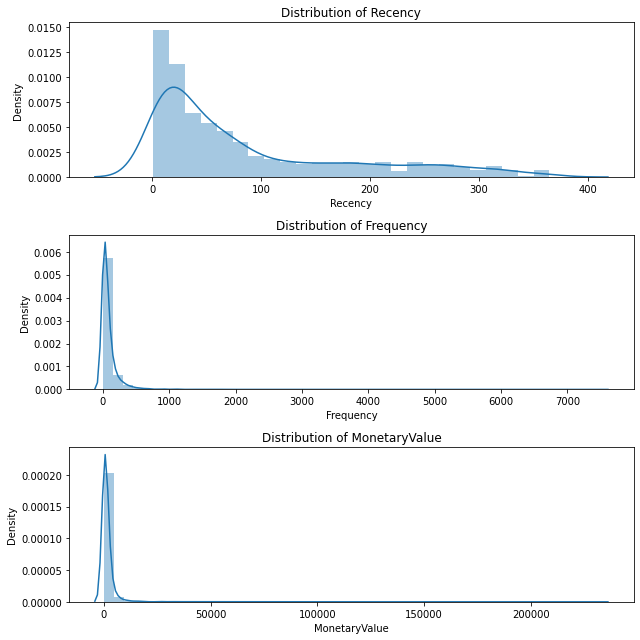

In [110]:
# Plot all 3 graphs together for summary findings
plt.figure(figsize=(9, 9))

plt.subplot(3, 1, 1)
check_skew(df_rfm,'Recency')

plt.subplot(3, 1, 2)
check_skew(df_rfm,'Frequency')

plt.subplot(3, 1, 3)
check_skew(df_rfm,'MonetaryValue')

plt.tight_layout()
plt.savefig('before_transform.png', format='png', dpi=1000)

Above we can see all the 3 graphs are positively skewed.

In [111]:
#extracting mean count etc
df_rfm.describe()

,Recency,Frequency,MonetaryValue
count,3854.000000,3854.000000,3854.000000
mean,87.980540,87.222366,1818.264267
std,93.431824,209.423937,7190.915178
min,1.000000,1.000000,3.750000
25%,18.000000,16.250000,291.910000
50%,50.000000,40.000000,638.540000
75%,134.000000,96.000000,1545.567500
max,365.000000,7491.000000,231822.690000


In [112]:
# Copy original to new df
df_rfm_log = df_rfm.copy()

# Data Pre-Processing for Negative Value
df_rfm_log['MonetaryValue'] = (df_rfm_log['MonetaryValue'] - df_rfm_log['MonetaryValue'].min()) + 1

df_rfm_log.describe()

,Recency,Frequency,MonetaryValue
count,3854.000000,3854.000000,3854.000000
mean,87.980540,87.222366,1815.514267
std,93.431824,209.423937,7190.915178
min,1.000000,1.000000,1.000000
25%,18.000000,16.250000,289.160000
50%,50.000000,40.000000,635.790000
75%,134.000000,96.000000,1542.817500
max,365.000000,7491.000000,231819.940000


##log transformation:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

Recency's: Skew: -0.4729218733061046, : SkewtestResult(statistic=-11.425452174695339, pvalue=3.1202721941354987e-30)
Frequency's: Skew: -0.22769651815992994, : SkewtestResult(statistic=-5.709957369384244, pvalue=1.1300447597026015e-08)
MonetaryValue's: Skew: 0.3124770256993258, : SkewtestResult(statistic=7.75390422924715, pvalue=8.910954176101115e-15)


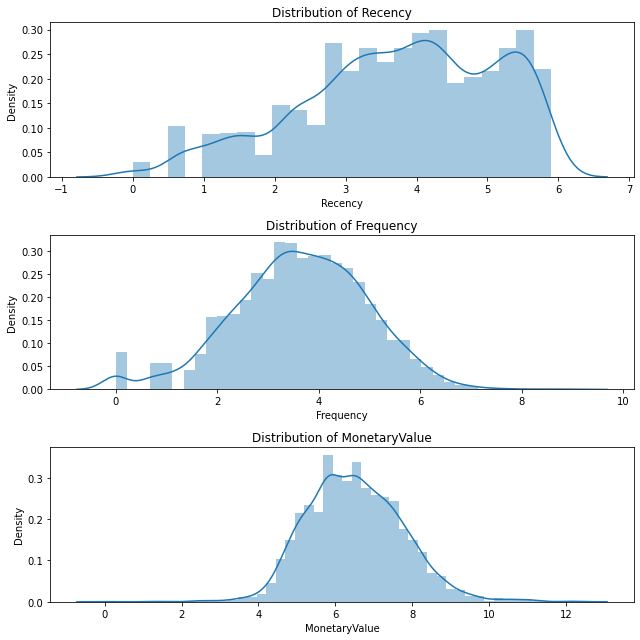

In [113]:
# Transform skewed data with log tranasformation
df_rfm_log = np.log(df_rfm_log)

# Check for skewness after log transformation
plt.figure(figsize=(9, 9))

plt.subplot(3, 1, 1)
check_skew(df_rfm_log,'Recency')

plt.subplot(3, 1, 2)
check_skew(df_rfm_log,'Frequency')

plt.subplot(3, 1, 3)
check_skew(df_rfm_log,'MonetaryValue')

plt.tight_layout()
plt.savefig('after_transform.png', format='png', dpi=1000)

Now after log transformation we can see data is normally distributed(normal distribution).

##**Centering and Scaling:**

In [114]:
#importing packages
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [115]:
# Scaling data
scaler = StandardScaler()
scaler.fit(df_rfm_log)
df_rfm_normal = scaler.transform(df_rfm_log)

df_rfm_normal = pd.DataFrame(df_rfm_normal, index=df_rfm_log.index, columns=df_rfm_log.columns)

# Check result after standardising
df_rfm_normal.describe().round(3)

,Recency,Frequency,MonetaryValue
count,3854.000,3854.000,3854.000
mean,-0.000,-0.000,0.000
std,1.000,1.000,1.000
min,-2.755,-2.755,-5.202
25%,-0.639,-0.645,-0.678
50%,0.109,0.036,-0.049
75%,0.831,0.699,0.659
max,1.565,3.995,4.660


##**K-Means Clustering**

##Finding Optimal Number of Clusters

There are two primary methods to define number of clusters:

  * Elbow criterion (visual method)
     * Plot number of clusters against within-cluster sum-of-squared-errors (SSE) - sum of squared distances from every data point to their cluster cente

  * Silhouette Score (math method)
      * Measures intra- and inter-cluster distance

In [116]:
def optimal_kmeans(dataset, start=2, end=11):
    '''
    Calculate the optimal number of kmeans
    
    INPUT:
        dataset : dataframe. Dataset for k-means to fit
        start : int. Starting range of kmeans to test
        end : int. Ending range of kmeans to test
    OUTPUT:
        Values of Inertia and Silhouette Score.
        Lineplot of values of Inertia and Silhouette Score.
    '''
    
    # Create empty lists to store values for plotting graphs
    n_clu = []
    km_ss = []
    inertia = []

    # Create a for loop to find optimal n_clusters
    for n_clusters in range(start, end):

        # Create cluster labels
        kmeans = KMeans(n_clusters=n_clusters)
        labels = kmeans.fit_predict(dataset)

        # Calcualte model performance
        silhouette_avg = round(silhouette_score(dataset, labels, random_state=1), 3)
        inertia_score = round(kmeans.inertia_, 2)

        # Append score to lists
        km_ss.append(silhouette_avg)
        n_clu.append(n_clusters)
        inertia.append(inertia_score)

        print("No. Clusters: {}, Silhouette Score(SS): {}, SS Delta: {}, Inertia: {}, Inertia Delta: {}".format(
            n_clusters, 
            silhouette_avg, 
            (km_ss[n_clusters - start] - km_ss[n_clusters - start - 1]).round(3), 
            inertia_score, 
            (inertia[n_clusters - start] - inertia[n_clusters - start - 1]).round(3)))

        # Plot graph at the end of loop
        if n_clusters == end - 1:
            plt.figure(figsize=(9,6))

            plt.subplot(2, 1, 1)
            plt.title('Within-Cluster Sum-of-Squares / Inertia')
            sns.pointplot(x=n_clu, y=inertia)

            plt.subplot(2, 1, 2)
            plt.title('Silhouette Score')
            sns.pointplot(x=n_clu, y=km_ss)
            plt.tight_layout()
            plt.show()

No. Clusters: 2, Silhouette Score(SS): 0.394, SS Delta: 0.0, Inertia: 6121.72, Inertia Delta: 0.0
No. Clusters: 3, Silhouette Score(SS): 0.301, SS Delta: -0.093, Inertia: 4752.08, Inertia Delta: -1369.64
No. Clusters: 4, Silhouette Score(SS): 0.303, SS Delta: 0.002, Inertia: 3952.92, Inertia Delta: -799.16
No. Clusters: 5, Silhouette Score(SS): 0.279, SS Delta: -0.024, Inertia: 3345.3, Inertia Delta: -607.62
No. Clusters: 6, Silhouette Score(SS): 0.272, SS Delta: -0.007, Inertia: 3000.52, Inertia Delta: -344.78
No. Clusters: 7, Silhouette Score(SS): 0.264, SS Delta: -0.008, Inertia: 2724.63, Inertia Delta: -275.89
No. Clusters: 8, Silhouette Score(SS): 0.259, SS Delta: -0.005, Inertia: 2515.25, Inertia Delta: -209.38
No. Clusters: 9, Silhouette Score(SS): 0.255, SS Delta: -0.004, Inertia: 2354.02, Inertia Delta: -161.23
No. Clusters: 10, Silhouette Score(SS): 0.266, SS Delta: 0.011, Inertia: 2207.63, Inertia Delta: -146.39


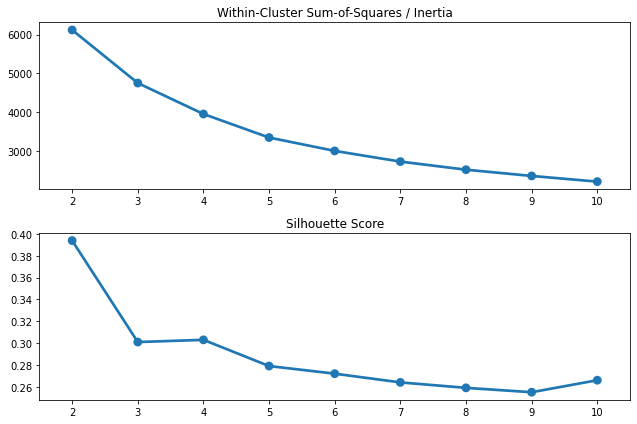

In [117]:
optimal_kmeans(df_rfm_normal)

**OBSERVATION:**

* Based on the inertia and silhouette score, the optimal number of cluster is 3. However, during the implemention of KMEans, cluster of 3, 4, and 5 will be tested to experiment which cluster makes most business sense.